# Best Neighborhood in Pittsburgh

## Metric
### Average Neighborhood Income 
I am using the average household income of each neighborhood as the metric for determining which neighborhood is the best. The average household income could tell me a lot about a neighborhood's overall living conditions and opportunities. A higher average household income may indicate that residents have access to better-paying job opportunities and housing conditions. Wealthier neighborhoods may correlate to lower crime rates, and better maintained infastructures. Since property taxes often fund education, higher-income neighborhoods would have access to a better public education.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
url = "https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/b119be7e-1c70-4bbe-bf34-2056fef533ec/download/house"

data = pd.read_csv(url)

print(data.columns)

Index(['Neighborhood', 'Id', 'Estimate; Total:', 'Margin of Error; Total:',
       'Estimate; Total: - Less than $10,000',
       'Margin of Error; Total: - Less than $10,000',
       'Estimate; Total: - $10,000 to $14,999',
       'Margin of Error; Total: - $10,000 to $14,999',
       'Estimate; Total: - $15,000 to $19,999',
       'Margin of Error; Total: - $15,000 to $19,999',
       'Estimate; Total: - $20,000 to $24,999',
       'Margin of Error; Total: - $20,000 to $24,999',
       'Estimate; Total: - $25,000 to $29,999',
       'Margin of Error; Total: - $25,000 to $29,999',
       'Estimate; Total: - $30,000 to $34,999',
       'Margin of Error; Total: - $30,000 to $34,999',
       'Estimate; Total: - $35,000 to $39,999',
       'Margin of Error; Total: - $35,000 to $39,999',
       'Estimate; Total: - $40,000 to $44,999',
       'Margin of Error; Total: - $40,000 to $44,999',
       'Estimate; Total: - $45,000 to $49,999',
       'Margin of Error; Total: - $45,000 to $49,999',

The data set displays the total count of households whose income were recorded or estimated accross Pittsburgh neighborhoods, and presents the distribution of those households across different income ranges. 

Because the income data are presented in ranges, I would use the midpoint in order to develop a method of comparison. This approach would also minimize the impact of outliers, giving me a more accurate estimate of the typical household income in each neighborhood.

In [15]:
midpoints = {
    "Estimate; Total: - Less than $10,000": 5000,
    "Estimate; Total: - $10,000 to $14,999": 12500,
    "Estimate; Total: - $15,000 to $19,999": 17500,
    "Estimate; Total: - $20,000 to $24,999": 22500,
    "Estimate; Total: - $25,000 to $29,999": 27500,
    "Estimate; Total: - $30,000 to $34,999": 32500,
    "Estimate; Total: - $35,000 to $39,999": 37500,
    "Estimate; Total: - $40,000 to $44,999": 42500,
    "Estimate; Total: - $45,000 to $49,999": 47500,
    "Estimate; Total: - $50,000 to $59,999": 55000,
    "Estimate; Total: - $60,000 to $74,999": 67500,
    "Estimate; Total: - $75,000 to $99,999": 87500,
    "Estimate; Total: - $100,000 to $124,999": 112500,
    "Estimate; Total: - $125,000 to $149,999": 137500,
    "Estimate; Total: - $150,000 to $199,999": 175000,
    "Estimate; Total: - $200,000 or more": 225000
}

In [21]:
data["Weighted Income"] = sum(data[col] * midpoint for col, midpoint in midpoints.items())
data["Average Income"] = data["Weighted Income"] / data["Estimate; Total:"]
sorted_df = data[["Neighborhood", "Average Income"]].sort_values(by="Average Income", ascending=False)
sorted_df["Average Income"] = sorted_df["Average Income"].apply(lambda x: f"${x:,.2f}")
print(sorted_df.to_string(index=False))

             Neighborhood Average Income
      Squirrel Hill North    $117,421.36
             Point Breeze    $109,053.16
           Strip District    $108,605.77
            Regent Square     $98,198.53
Central Business District     $88,531.50
           Allegheny West     $85,085.62
      Squirrel Hill South     $79,884.20
              North Shore     $78,685.06
                Fairywood     $78,148.36
              South Shore     $77,500.00
            Highland Park     $76,135.37
           Swisshelm Park     $74,371.75
            New Homestead     $73,614.78
         Duquesne Heights     $73,433.76
              Summer Hill     $70,531.91
               Greenfield     $70,263.23
                Shadyside     $68,636.42
               Banksville     $68,272.10
                  Chateau     $67,500.00
         South Side Flats     $66,985.05
          Stanton Heights     $63,162.69
              Perry North     $62,627.69
                 Westwood     $62,526.81
         Brighto

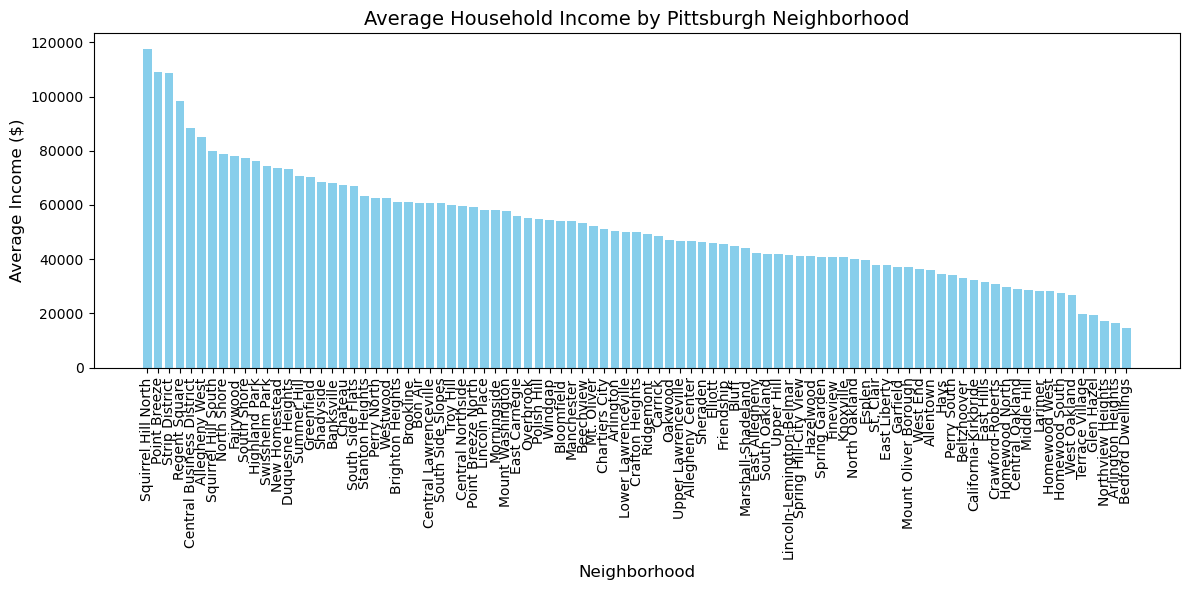

In [25]:
sorted_df["Average Income"] = sorted_df["Average Income"].replace('[\$,]', '', regex=True).astype(float)
plt.figure(figsize=(12, 6))
plt.bar(sorted_df["Neighborhood"], sorted_df["Average Income"], color="skyblue")
plt.title("Average Household Income by Pittsburgh Neighborhood", fontsize=14)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Average Income ($)", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()